In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
import matplotlib.pyplot as plt
from datetime import timedelta

In [2]:
df = pd.read_csv(r'C:\Users\M\Desktop\ironhacker\final-project\final2.csv')
df

,date,open,high,low,close,volume,total_value,weighted_price
0,2014-11-28,363.59,381.34,360.57,376.28,8617.15,3.220878e+06,373.775341
1,2014-11-29,376.42,386.60,372.25,376.72,7245.19,2.746157e+06,379.031751
2,2014-11-30,376.57,381.99,373.32,373.34,3046.33,1.145567e+06,376.048101
3,2014-12-01,376.40,382.31,373.03,378.39,6660.56,2.520662e+06,378.446012
4,2014-12-02,378.39,382.86,375.23,379.25,6832.53,2.593576e+06,379.592400
...,...,...,...,...,...,...,...,...
3620,2024-10-26,66577.77,67366.46,66343.25,67014.72,14159.11,9.464474e+08,66843.706537
3621,2024-10-27,67014.72,68254.55,66852.50,67945.14,12105.31,8.185810e+08,67621.647951
3622,2024-10-28,67945.14,70241.74,67541.00,69925.83,42091.94,2.902994e+09,68967.932842
3623,2024-10-29,69925.83,73612.24,69725.05,72723.67,58289.36,4.194343e+09,71957.271337


In [6]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Select the 'close' column as the target variable
target_column = 'close'

# Initialize the scaler and scale data for training
scaler = MinMaxScaler(feature_range=(0, 1))
df[target_column] = scaler.fit_transform(df[[target_column]])

# Set the lookback period for creating time series features
lookback = 60
X, y = [], []
for i in range(lookback, len(df)):
    X.append(df[target_column].values[i-lookback:i])
    y.append(df[target_column].values[i])

# Convert lists to numpy arrays and reshape
X, y = np.array(X), np.array(y)

# Split data into training and test sets (80% train, 20% test)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape X for RandomForest (requires 2D input)
X_train_rf = X_train.reshape(X_train.shape[0], -1)
X_test_rf = X_test.reshape(X_test.shape[0], -1)

#Initialize and train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train)

# Make predictions on the test set
test_predictions = rf_model.predict(X_test_rf)

#Calculate RMSE for model evaluation
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
test_predictions_actual = scaler.inverse_transform(test_predictions.reshape(-1, 1))
test_rmse = sqrt(mean_squared_error(y_test_actual, test_predictions_actual))
print(f"Test RMSE: {test_rmse}")

Test RMSE: 2463.7498721975962


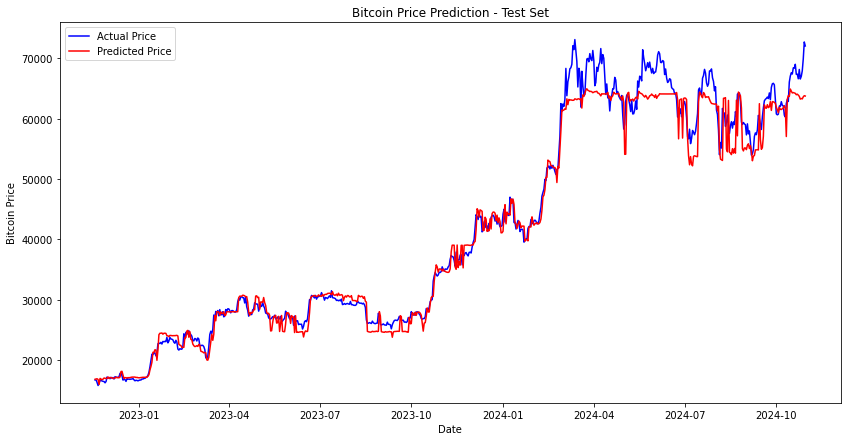

In [5]:
# Visualize the Actual vs. Predicted prices on the test set
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test_actual):], y_test_actual, label="Actual Price", color="blue")
plt.plot(df.index[-len(test_predictions_actual):], test_predictions_actual, label="Predicted Price", color="red")
plt.title("Bitcoin Price Prediction - Test Set")
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.legend()
plt.show()



In [10]:
#Predict the Next 30 Days
# Use the last lookback data from X_test for rolling predictions
next_30_days_predictions = []
last_data = X_test[-1].reshape(1, -1)  # Start with the last set of features from X_test

for _ in range(30):
    # Predict the next day
    next_day_prediction = rf_model.predict(last_data)[0]
    next_30_days_predictions.append(next_day_prediction)
    
    # Update the last_data to include the next prediction and drop the first element
    last_data = np.append(last_data[:, 1:], [[next_day_prediction]], axis=1)

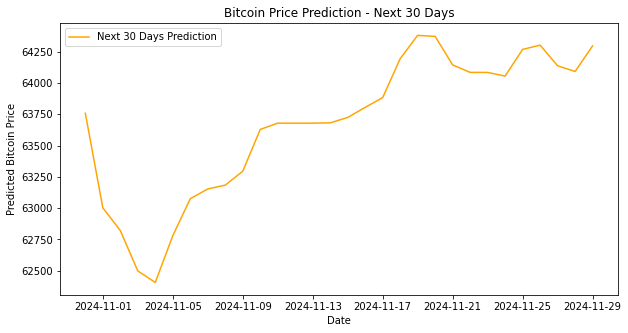

In [11]:
# Inverse transform the predictions
next_30_days_predictions_actual = scaler.inverse_transform(np.array(next_30_days_predictions).reshape(-1, 1))

# SVisualize the Next 30 Days' Predictions
future_dates = pd.date_range(df.index[-1] + timedelta(days=1), periods=30)
plt.figure(figsize=(10, 5))
plt.plot(future_dates, next_30_days_predictions_actual, label="Next 30 Days Prediction", color="orange")
plt.title("Bitcoin Price Prediction - Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Predicted Bitcoin Price")
plt.legend()
plt.show()  # Ensures the plot displays

In [12]:
#extracting data
# Set the lookback period for creating time series features
lookback = 60
X, y = [], []

for i in range(lookback, len(df)):
    X.append(df[target_column].values[i - lookback:i])
    y.append(df[target_column].values[i])

# Convert lists to numpy arrays
X, y = np.array(X), np.array(y)

# Split data into training and test sets (80% train, 20% test)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape X for Random Forest model (it expects 2D input)
X_train_rf = X_train.reshape(X_train.shape[0], -1)
X_test_rf = X_test.reshape(X_test.shape[0], -1)

# Initialize and train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train)

# Make predictions on the test set
test_predictions_rf = rf_model.predict(X_test_rf)

# Inverse transform to return predictions and actual values to original price scale
y_test_reshaped = y_test.reshape(-1, 1)  # Reshape for inverse scaling
test_predictions_rf_reshaped = test_predictions_rf.reshape(-1, 1)

# Perform inverse transformation
y_test_actual = scaler.inverse_transform(y_test_reshaped).flatten()
y_pred_rf_actual = scaler.inverse_transform(test_predictions_rf_reshaped).flatten()

# Create DataFrame and export to CSV with meaningful column names
rf_test_data = pd.DataFrame({
    'Test_Index': np.arange(len(y_test_actual)),       # Index for each test observation
    'y_test_actual': y_test_actual,                    # Actual y_test values after inverse transformation
    'y_pred_rf_actual': y_pred_rf_actual               # Predicted y_test values after inverse transformation
})

# Export to CSV
rf_test_data.to_csv(r'C:\Users\M\Desktop\ironhacker\final-project\rf_model_test_data.csv', index=False)


Export completed: 'rf_model_test_data.csv'


In [18]:
# adding new features but reaching higher RMSE
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Generate additional features based on the provided dataset
df['7_day_avg'] = df['close'].rolling(window=7).mean()
df['30_day_avg'] = df['close'].rolling(window=30).mean()
df['7_day_volatility'] = df['close'].rolling(window=7).std()
df['30_day_volatility'] = df['close'].rolling(window=30).std()
df['volume_avg_7d'] = df['volume'].rolling(window=7).mean()
df['price_position'] = (df['close'] - df['low']) / (df['high'] - df['low'])

# Drop rows with NaN values generated by rolling calculations
df.dropna(inplace=True)

# Define the target and feature columns
target_column = 'close'
feature_columns = ['volume', '7_day_avg', '30_day_avg', '7_day_volatility', '30_day_volatility', 
                   'volume_avg_7d', 'price_position']

# Scale features and target separately
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))

df[feature_columns] = scaler_features.fit_transform(df[feature_columns])
df[target_column] = scaler_target.fit_transform(df[[target_column]])

# Prepare sequences of data for each 60-day lookback
lookback = 60
X, y = [], []
for i in range(lookback, len(df)):
    X.append(df[feature_columns].iloc[i-lookback:i].values.flatten())  # Flatten each 60-day window
    y.append(df[target_column].iloc[i])

X, y = np.array(X), np.array(y)

# Split data into training and test sets (80% train, 20% test)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize and train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
test_predictions = rf_model.predict(X_test)

# Inverse transform the predictions and the true values to their original scale
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1, 1))
test_predictions_actual = scaler_target.inverse_transform(test_predictions.reshape(-1, 1))

# Calculate RMSE for model evaluation
test_rmse = sqrt(mean_squared_error(y_test_actual, test_predictions_actual))
print(f"Test RMSE: {test_rmse}")

Test RMSE: 4950.518188413956


In [4]:
#applying grid search
# Convert date column to datetime and set it as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Choose features that may correlate with 'close' and set the target variable
selected_features = ['close', 'volume']
data = df[selected_features]

# Initialize the scaler and scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Set lookback period for creating time series features
lookback = 60
X, y = [], []
for i in range(lookback, len(scaled_data)):
    X.append(scaled_data[i-lookback:i, :-1])  # Use selected features except 'close' as input
    y.append(scaled_data[i, 0])               # Use 'close' as the target variable

# Convert lists to numpy arrays
X, y = np.array(X), np.array(y)

# Flatten the 3D input to 2D for the RandomForest model
X = X.reshape(X.shape[0], -1)

# Split data into training and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestRegressor and perform grid search
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Select the best model
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
test_predictions = best_rf_model.predict(X_test)

# Inverse transform predictions and actual values for evaluation
# Correct the zero padding to use a single column for 'volume'
y_test_actual = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))], axis=1))[:, 0]
test_predictions_actual = scaler.inverse_transform(np.concatenate([test_predictions.reshape(-1, 1), np.zeros((test_predictions.shape[0], 1))], axis=1))[:, 0]

# Calculate RMSE for the optimized model
test_rmse = sqrt(mean_squared_error(y_test_actual, test_predictions_actual))
print(f"Optimized Test RMSE: {test_rmse}")

Optimized Test RMSE: 2317.2266698634753
